## Análise Dados de Lançamentos MLB
#### Jogo entre Colorado Rockies e LA Dodgers -18 Junho 2014

-------------------------------------------------------------------------------------------

Jogo histórico de Kershaw, que dominou os lançamentos num jogo quase perfeito.

"https://abcnews.go.com/Sports/perfect-night-clayton-kershaw/story?id=24205920"

<img controls src="https://s.abcnews.com/images/Sports/AP_KERSHAW3_140619_d_16x9_992.jpg" />

In [2]:
import requests as rq
import xml.etree.ElementTree as ET 
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
from termcolor import colored
url = "http://gd2.mlb.com/components/game/mlb/year_2015/month_10/day_03/gid_2015_10_03_wasmlb_nynmlb_1/inning/inning_all.xml"
url_players = "http://gd2.mlb.com/components/game/mlb/year_2015/month_10/day_03/gid_2015_10_03_wasmlb_nynmlb_1/players.xml"

### Criar dicionário com o nome dos jogadores

In [3]:
resp = rq.get(url_players)
xmlfile="myplayers.xml"
with open(xmlfile, "wb") as f:
    f.write(resp.content)
statinfo = os.stat(xmlfile)
print(colored(xmlfile + ": " + str(round(statinfo.st_size/1024)) + "KB/n"))

myplayers.xml: 24KB/n


In [4]:
tree = ET.parse(xmlfile)
game = tree.getroot()
teams = game.findall("team")
playerDict = {}

for team in teams:
    print(team.attrib.get("name"))
    players = team.findall("player")
    for player in players:
        print("    " , player.attrib.get("id"), player.attrib.get("first"), player.attrib.get("last"))
        playerDict[player.attrib.get("id")] = player.attrib.get("first") + " " + player.attrib.get("last")

Washington Nationals
     150029 Jayson Werth
     407819 Matt Thornton
     407862 Reed Johnson
     434661 Nate McLouth
     435622 Ian Desmond
     445163 Casey Janssen
     446653 Jose Lobaton
     449097 Jonathan Papelbon
     450729 Doug Fister
     452655 Denard Span
     453286 Max Scherzer
     457787 Danny Espinosa
     458530 Erik Davis
     461829 Gio Gonzalez
     462564 Dan Uggla
     467092 Wilson Ramos
     475582 Ryan Zimmerman
     488862 Yunel Escobar
     489138 Tyler Moore
     489334 Craig Stammen
     502304 David Carpenter
     502578 Aaron Barrett
     514669 Rafael Martin
     518863 Taylor Jordan
     519208 Clint Robinson
     519301 Sammy Solis
     519322 Drew Storen
     519455 Jordan Zimmermann
     543685 Anthony Rendon
     543699 Tanner Roark
     544925 Matthew den Dekker
     544931 Stephen Strasburg
     547180 Bryce Harper
     553878 Felipe Vazquez
     572191 Michael A. Taylor
     594694 Wilmer Difo
     594840 Matt Grace
     595014 Blake Trei

In [16]:
playerDict["599096"]

'Dilson Herrera'

### Extrair informação do jogo

In [17]:
resp = rq.get(url)
xmlfile="mygame.xml"
with open(xmlfile, "wb") as f:
    f.write(resp.content)
statinfo = os.stat(xmlfile)
print(colored(xmlfile + ": " + str(round(statinfo.st_size/1024)) + "KB/n"))

mygame.xml: 222KB/n


In [18]:
tree = ET.parse(xmlfile)
root = tree.getroot()

for child in root:
    print(child.tag, child.attrib.get("num"))
    for frame in child:
        print("   ", frame.tag, frame.attrib)

inning 1
    top {}
    bottom {}
inning 2
    top {}
    bottom {}
inning 3
    top {}
    bottom {}
inning 4
    top {}
    bottom {}
inning 5
    top {}
    bottom {}
inning 6
    top {}
    bottom {}
inning 7
    top {}
    bottom {}
inning 8
    top {}
    bottom {}
inning 9
    top {}
    bottom {}


In [19]:
frames = ["top", "bottom"]
pitchDict = {"FA":"Fastball", "FF":"4-seam FB", "FT":"2-seam FB", "FC":"FB cutter", "":"unknown", 
             None:"none", "FS":"FB splitter", "SL":"Slider", "CH":"Changeup", "CU":"Curveball", "KC":"Knucle-curve", 
             "KN":"KnicleBall", "EP":"Eephus", "UN":"Unidentified", "PO":"Pitchout", "SI":"Sinker",
             "SF":"Split Finger"
            }
totalPitchCount = 0
innings = root.findall("./inning")
for inning in innings:
    for i in range(len(frames)):
        color = "green" if i == 0 else "yellow"
        print(colored("\nInning: " + inning.attrib.get("num") + "(" + frames[i] +
                       ")" , color , attrs=["reverse"]))
        fr = inning.find(frames[i])
        if fr is not None:
            for ab in fr.iter("atbat"):
                battername = playerDict[ab.get("batter")]
                abPitchCount = 0
                print(colored("   " + battername, color, attrs=["bold"]))
                
                pitches = ab.findall("pitch")
                for pitch in pitches:
                    abPitchCount = abPitchCount + 1
                    totalPitchCount = totalPitchCount + 1
                    verbosePitch = pitchDict[pitch.get("pitch_type")]
                    print( colored("       " + str(abPitchCount) + ": " + verbosePitch, color))
                print("       " + colored(ab.attrib.get("event"), color, attrs=["underline"]))
print("Total Pitches: " + str(totalPitchCount))



Inning: 1(top)
   Anthony Rendon
       1: 4-seam FB
       2: 4-seam FB
       3: Curveball
       4: Curveball
       Strikeout
   Yunel Escobar
       1: Changeup
       2: 4-seam FB
       3: Curveball
       4: Changeup
       Groundout
   Bryce Harper
       1: Sinker
       2: Changeup
       3: 4-seam FB
       4: 4-seam FB
       5: 4-seam FB
       Strikeout

Inning: 1(bottom)
   Juan Lagares
       1: 2-seam FB
       2: 2-seam FB
       Groundout
   David Wright
       1: 2-seam FB
       2: 2-seam FB
       3: Curveball
       4: 2-seam FB
       5: 4-seam FB
       6: 2-seam FB
       7: 2-seam FB
       8: 2-seam FB
       Strikeout
   Daniel Murphy
       1: 2-seam FB
       2: 4-seam FB
       Single
   Yoenis Cespedes
       1: 2-seam FB
       2: 2-seam FB
       3: Changeup
       Forceout

Inning: 2(top)
   Jayson Werth
       1: 4-seam FB
       2: Sinker
       3: Curveball
       4: Sinker
       Groundout
   Clint Robinson
       1: Changeup
       2: Changeup

### Criar DataFrame com o Pandas

In [20]:
frames = ["top", "bottom"]
pitchDF = pd.DataFrame(columns = ["pitchIdx", "inning", "frame", "ab", "adIdx", "batter", "stand",
                                 "speed", "pitchtype", "px", "pz", "szTop", "szBottom", "des"])

totalPitchCount = 0
topPitchCount = 0
bottomPitchCount = 0
innings = root.findall("./inning")
for inning in innings:
    for i in range(len(frames)):
        color = "green" if i == 0 else "yellow"
        print(colored("\nInning: " + inning.attrib.get("num") + "(" + frames[i] +
                       ")" , color , attrs=["reverse"]))
        fr = inning.find(frames[i])
        if fr is not None:
            for ab in fr.iter("atbat"):
                battername = playerDict[ab.get("batter")]
                standside = ab.get("stand")
                abIdx = ab.get("num")         
                abPitchCount = 0
                print(colored("   " + battername, color, attrs=["bold"]))
                
                pitches = ab.findall("pitch")
                for pitch in pitches:
                    if pitch.attrib.get("start_speed") is None:
                        speed = 0
                    else:
                        speed = float(pitch.attrib.get("start_speed"))
                    pxFloat = 0.0 if pitch.attrib.get("px") == None else float("{0:.2f}".format(float(pitch.attrib.get("px")))) 
                    pzFloat = 0.0 if pitch.attrib.get("pz") == None else float("{0:.2f}".format(float(pitch.attrib.get("pz")))) 
                    szTop = 0.0 if pitch.attrib.get("sz_top") == None else float("{0:.2f}".format(float(pitch.attrib.get("sz_top")))) 
                    szBot = 0.0 if pitch.attrib.get("sz_bot") == None else float("{0:.2f}".format(float(pitch.attrib.get("sz_bot")))) 
                    print(pxFloat, pzFloat, szTop, szBot)
                    
                    abPitchCount = abPitchCount + 1
                    totalPitchCount = totalPitchCount + 1
                    if frames[i] == "top":
                        topPitchCount = topPitchCount + 1
                    else:
                        bottomPitchCount = bottomPitchCount + 1
                    inn = inning.attrib.get("num")
                    des = pitch.get("des")
                    verbosePitch = pitchDict[pitch.get("pitch_type")]
                    print( colored("       " + str(abPitchCount) + ": " + verbosePitch, color))
                    pitchDF.loc[totalPitchCount] = [totalPitchCount, inn, frames[i], abIdx, abPitchCount, battername, standside, speed, verbosePitch, pxFloat, pzFloat, szTop, szBot, des]
                print("       " + colored(ab.attrib.get("event"), color, attrs=["underline"]))
print("Total Pitches: " + str(totalPitchCount))


Inning: 1(top)
   Anthony Rendon
0.31 2.45 3.44 1.54
       1: 4-seam FB
-0.21 1.8 3.38 1.5
       2: 4-seam FB
1.9 1.19 3.3 1.45
       3: Curveball
0.07 2.02 3.34 1.5
       4: Curveball
       Strikeout
   Yunel Escobar
-0.8 1.4 3.31 1.48
       1: Changeup
-0.33 1.04 3.27 1.36
       2: 4-seam FB
0.14 2.18 3.31 1.48
       3: Curveball
-0.38 2.07 3.31 1.48
       4: Changeup
       Groundout
   Bryce Harper
-1.16 1.31 3.19 1.65
       1: Sinker
-0.34 1.24 3.19 1.58
       2: Changeup
-0.22 2.78 3.19 1.62
       3: 4-seam FB
-0.35 2.52 3.19 1.46
       4: 4-seam FB
-0.46 2.64 3.19 1.46
       5: 4-seam FB
       Strikeout

Inning: 1(bottom)
   Juan Lagares
0.42 2.83 3.4 1.55
       1: 2-seam FB
0.98 1.35 3.41 1.58
       2: 2-seam FB
       Groundout
   David Wright
1.19 2.63 3.15 1.49
       1: 2-seam FB
0.53 1.94 3.47 1.6
       2: 2-seam FB
1.39 2.31 3.37 1.64
       3: Curveball
-0.05 1.91 3.47 1.6
       4: 2-seam FB
0.58 4.03 3.28 1.63
       5: 4-seam FB
0.22 2.75 3.47 1.6
 

0.48 3.22 3.14 1.43
       2: Changeup
-0.01 3.86 3.14 1.48
       3: 4-seam FB
-1.34 2.12 3.14 1.43
       4: 4-seam FB
-0.19 1.55 3.14 1.43
       5: Curveball
1.54 3.66 3.14 1.4
       6: Curveball
0.24 2.45 3.14 1.43
       7: 2-seam FB
       Flyout

Inning: 5(top)
   Ian Desmond
0.06 3.55 3.27 1.62
       1: Curveball
0.68 2.1 3.2 1.59
       2: Curveball
0.01 0.32 3.38 1.56
       3: Sinker
-0.83 2.69 3.38 1.49
       4: Changeup
-0.65 4.17 3.38 1.49
       5: 4-seam FB
       Strikeout
   Matthew den Dekker
0.05 2.12 3.36 1.53
       1: Curveball
0.94 1.99 3.52 1.69
       2: Sinker
0.12 2.34 3.29 1.45
       3: Curveball
0.58 2.65 3.59 1.64
       4: 4-seam FB
       Strikeout
   Jose Lobaton
-0.99 1.97 3.49 1.57
       1: Sinker
-0.71 3.49 3.49 1.57
       2: Sinker
-0.86 1.54 3.49 1.57
       3: Changeup
       Groundout

Inning: 5(bottom)
   Noah Syndergaard
-0.41 2.25 3.53 1.72
       1: 4-seam FB
0.05 2.07 3.64 1.68
       2: Changeup
       Lineout
   Juan Lagares
0.09 2

-0.55 2.64 3.53 1.57
       6: Curveball
       Strikeout
   Michael Cuddyer
-0.66 3.3 3.47 1.57
       1: FB cutter
       Flyout

Inning: 9(top)
   Clint Robinson
-0.91 3.03 3.84 1.89
       1: FB cutter
-0.61 2.08 3.84 1.8
       2: FB cutter
       Single
   Ian Desmond
0.0 1.07 3.41 1.56
       1: 4-seam FB
0.92 1.53 3.38 1.49
       2: Changeup
       Groundout
   Matthew den Dekker
0.19 2.02 3.5 1.65
       1: FB cutter
-0.41 2.29 3.41 1.57
       2: 4-seam FB
-0.93 0.95 3.56 1.65
       3: FB cutter
-1.5 1.29 3.52 1.58
       4: 2-seam FB
-0.22 0.35 3.6 1.61
       5: 4-seam FB
-2.09 1.24 3.59 1.62
       6: FB cutter
       Walk
   Jose Lobaton
-0.04 1.2 3.33 1.46
       1: 2-seam FB
0.57 0.2 3.3 1.53
       2: 2-seam FB
0.94 2.2 3.27 1.53
       3: Changeup
       Runner Out

Inning: 9(bottom)
   Lucas Duda
0.89 3.16 3.87 2.04
       1: 4-seam FB
-0.15 2.74 3.81 1.77
       2: 4-seam FB
-1.24 1.26 3.85 1.87
       3: 4-seam FB
-0.59 2.22 3.81 1.79
       4: 4-seam FB
-0.48 1.

In [21]:
pitchDF.head(20)

,pitchIdx,inning,frame,ab,adIdx,batter,stand,speed,pitchtype,px,pz,szTop,szBottom,des
1,1,1,top,1,1,Anthony Rendon,R,96.0,4-seam FB,0.31,2.45,3.44,1.54,Foul
2,2,1,top,1,2,Anthony Rendon,R,97.2,4-seam FB,-0.21,1.80,3.38,1.50,Called Strike
3,3,1,top,1,3,Anthony Rendon,R,79.7,Curveball,1.90,1.19,3.30,1.45,Ball
4,4,1,top,1,4,Anthony Rendon,R,80.9,Curveball,0.07,2.02,3.34,1.50,Called Strike
5,5,1,top,2,1,Yunel Escobar,R,88.4,Changeup,-0.80,1.40,3.31,1.48,Foul
6,6,1,top,2,2,Yunel Escobar,R,96.2,4-seam FB,-0.33,1.04,3.27,1.36,Ball
7,7,1,top,2,3,Yunel Escobar,R,81.4,Curveball,0.14,2.18,3.31,1.48,Swinging Strike
8,8,1,top,2,4,Yunel Escobar,R,87.6,Changeup,-0.38,2.07,3.31,1.48,"In play, out(s)"
9,9,1,top,3,1,Bryce Harper,L,97.7,Sinker,-1.16,1.31,3.19,1.65,Ball
10,10,1,top,3,2,Bryce Harper,L,88.9,Changeup,-0.34,1.24,3.19,1.58,Ball


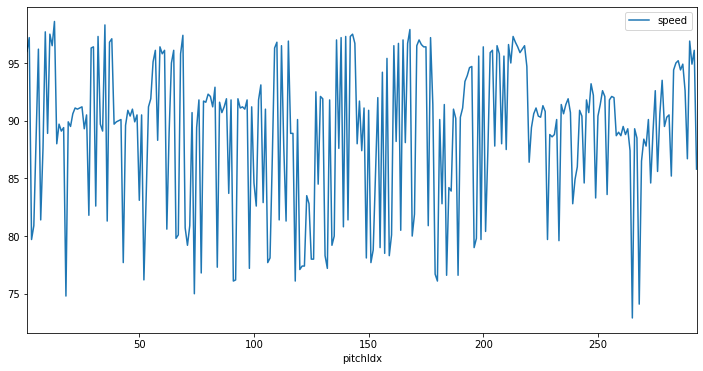

In [22]:
lines = pitchDF.plot.line(x="pitchIdx", y="speed", figsize=[12,6])

In [23]:
pitchDF.info()
pitchDF["pitchIdx"] = pitchDF["pitchIdx"].astype("int")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 293
Data columns (total 14 columns):
pitchIdx     293 non-null object
inning       293 non-null object
frame        293 non-null object
ab           293 non-null object
adIdx        293 non-null object
batter       293 non-null object
stand        293 non-null object
speed        293 non-null float64
pitchtype    293 non-null object
px           293 non-null float64
pz           293 non-null float64
szTop        293 non-null float64
szBottom     293 non-null float64
des          293 non-null object
dtypes: float64(5), object(9)
memory usage: 34.3+ KB


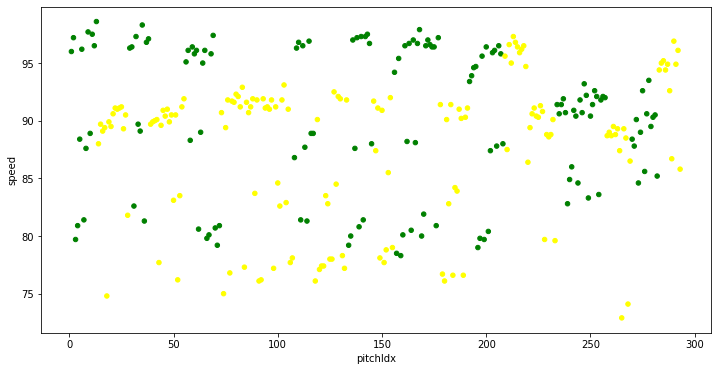

In [24]:
color = ["green" if f== "top" else "yellow" for f in pitchDF["frame"].tolist()]
pitchDF.plot(kind="scatter", x= "pitchIdx", y = "speed", color = color, figsize = [12,6])

In [25]:
pitchDF.loc[pitchDF["batter"] == "Max Scherzer"]

,pitchIdx,inning,frame,ab,adIdx,batter,stand,speed,pitchtype,px,pz,szTop,szBottom,des


### Desenho da StrikeZone

(-2, 2)

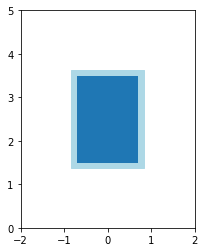

In [26]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect = "equal")

plateWidthInFeet = 17 / 12
expandedPlateInfeet = 20 / 12
szHeightInFeet = 3.5 - 1.5
ballInFeet = 3 / 12
halfBallInFeet = ballInFeet / 2

ax1.add_patch(patches.Rectangle((expandedPlateInfeet/-2, 1.5 - halfBallInFeet), expandedPlateInfeet, szHeightInFeet + ballInFeet, color = "lightblue"))
ax1.add_patch(patches.Rectangle((plateWidthInFeet/-2, 1.5), plateWidthInFeet, szHeightInFeet))
plt.ylim(0,5)
plt.xlim(-2,2)

### Fazer o Plot dos lançamentos do Kershaw

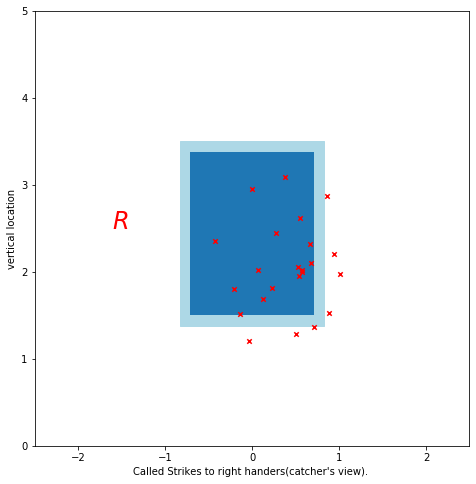

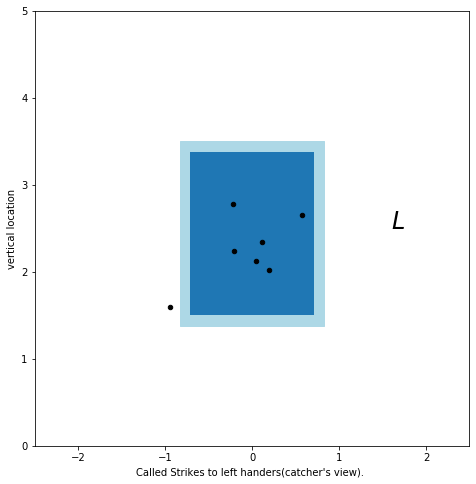

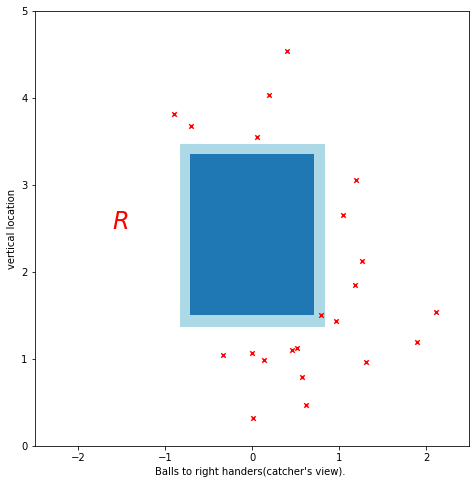

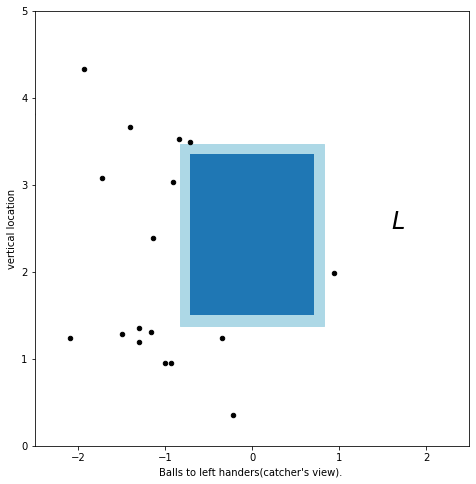

In [27]:
pitchcCalls = ["Called Strike", "Ball"]
sides = ["R", "L"]

colors = {"R":"red", "L":"black"}
markers = {"R":"x", "L":"o"}

for pitchcall in pitchcCalls:
    for sidename in sides:
        df = pitchDF.loc[pitchDF["des"] == pitchcall].loc[pitchDF["frame"]=="top"]
        mark = markers[sidename]
        colr = colors[sidename]
        
        df_side = df.loc[pitchDF["stand"] == sidename]
        ax1 = df_side.plot(kind="scatter", x = "px", y = "pz", marker = mark, color = colr, figsize = [8,8], ylim = [0,4], xlim= [-2,2])
        
        if sidename == "R":
            xcoord = -1.6
            handers = "right handers"
        else:
            xcoord = 1.6
            handers = "left handers"
        txtbatter = ax1.text(xcoord, 2.5, sidename, style = "italic", fontsize = 24, color = colr)
        
        plateWidthInFeet = 17 / 12
        expandedPlateInfeet = 20 / 12
        szTop = df["szTop"].iloc[0]
        szBottom = df["szBottom"].iloc[0]
        szHeightInFeet = szTop-szBottom
        ballInFeet = 3 / 12
        halfBallInFeet = ballInFeet / 2
        
        outrect = ax1.add_patch(patches.Rectangle((expandedPlateInfeet/-2, 1.5 - halfBallInFeet),
                                                  expandedPlateInfeet, szHeightInFeet + ballInFeet, color = "lightblue"))
        
        rect = ax1.add_patch(patches.Rectangle((plateWidthInFeet/-2, 1.5), plateWidthInFeet, szHeightInFeet))
        outrect.zorder = -2
        rect.zorder = -1
        
        ax1.set_xlabel(pitchcall + "s to " + handers + "(catcher's view). ")
        ax1.set_ylabel("vertical location")
        ax1.set_aspect(aspect=1)
        
        plt.ylim(0,5)
        plt.xlim(-2.5, 2.5)
        
